In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('data_csv.csv')
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [3]:
def drop_least_correlated(df):

    numeric_df = df.select_dtypes(include='number')

    corr_matrix = numeric_df.corr().abs()

    corr_matrix_lower = corr_matrix.where(~corr_matrix.mask(corr_matrix == 1).isna(), other=None)

    min_corr_value = corr_matrix_lower.min().min()
    least_corr_cols = corr_matrix_lower.stack().idxmin()

    col_to_drop = least_corr_cols[0]

    df_dropped = df.drop(columns=[col_to_drop])

    print(f"Column '{col_to_drop}' has the least correlation with others (correlation: {min_corr_value}) and will be removed.")

    return df_dropped

df_new = drop_least_correlated(df)

print("Updated DataFrame after dropping least correlated column:")
print(df_new)


Column 'A9' has the least correlation with others (correlation: 0.03427006890795802) and will be removed.
Updated DataFrame after dropping least correlated column:
      CASE_NO_PATIENT'S  A1  A2  A3  A4  A5  A6  A7  A8  \
0                     1   0   0   0   0   0   0   1   1   
1                     2   1   1   0   0   0   1   1   0   
2                     3   1   0   0   0   0   0   1   1   
3                     4   1   1   1   1   1   1   1   1   
4                     5   1   1   0   1   1   1   1   1   
...                 ...  ..  ..  ..  ..  ..  ..  ..  ..   
1980               1981   0   0   0   0   0   0   0   0   
1981               1982   0   0   0   0   0   0   0   0   
1982               1983   0   0   0   0   0   0   0   0   
1983               1984   0   0   0   0   0   0   0   0   
1984               1985   0   0   0   0   0   0   0   0   

      A10_Autism_Spectrum_Quotient  ...  \
0                                1  ...   
1                                0  ...  

In [4]:
numeric_columns = df_new.select_dtypes(include=[np.number])

# Initialize a DataFrame to keep track of outlier information
outlier_info = pd.DataFrame(index=numeric_columns.columns)

# Calculate IQR and identify outliers
for col in numeric_columns.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numeric_columns[col].quantile(0.25)
    Q3 = numeric_columns[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outlier_info.loc[col, 'lower_bound'] = lower_bound
    outlier_info.loc[col, 'upper_bound'] = upper_bound
    outlier_info.loc[col, 'total_outliers'] = ((numeric_columns[col] < lower_bound) | (numeric_columns[col] > upper_bound)).sum()

# Print total number of outliers for each column
print("Total number of outliers in each column:")
print(outlier_info['total_outliers'])

Total number of outliers in each column:
CASE_NO_PATIENT'S                  0.0
A1                                 0.0
A2                               473.0
A3                               423.0
A4                                 0.0
A5                                 0.0
A6                                 0.0
A7                                 0.0
A8                               484.0
A10_Autism_Spectrum_Quotient       0.0
Social_Responsiveness_Scale        0.0
Age_Years                          0.0
Qchat_10_Score                     0.0
Childhood Autism Rating Scale    248.0
Name: total_outliers, dtype: float64


In [5]:
df_cleaned_no_outliers = df_new[~((numeric_columns < outlier_info.loc[:, 'lower_bound']) | (numeric_columns > outlier_info.loc[:, 'upper_bound'])).any(axis=1)]

# Recompute outliers in the cleaned DataFrame
numeric_columns_cleaned = df_cleaned_no_outliers.select_dtypes(include=[np.number])
outlier_info_cleaned = pd.DataFrame(index=numeric_columns_cleaned.columns)

for col in numeric_columns_cleaned.columns:
    Q1 = numeric_columns_cleaned[col].quantile(0.25)
    Q3 = numeric_columns_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_info_cleaned.loc[col, 'lower_bound'] = lower_bound
    outlier_info_cleaned.loc[col, 'upper_bound'] = upper_bound
    outlier_info_cleaned.loc[col, 'total_outliers'] = ((numeric_columns_cleaned[col] < lower_bound) | (numeric_columns_cleaned[col] > upper_bound)).sum()

# Print total number of outliers for each column after removal
print("\nTotal number of outliers in each column after removal:")
print(outlier_info_cleaned['total_outliers'])


Total number of outliers in each column after removal:
CASE_NO_PATIENT'S                 60.0
A1                                56.0
A2                                 0.0
A3                                 0.0
A4                                37.0
A5                                49.0
A6                                60.0
A7                                90.0
A8                                 0.0
A10_Autism_Spectrum_Quotient       0.0
Social_Responsiveness_Scale      139.0
Age_Years                          0.0
Qchat_10_Score                     0.0
Childhood Autism Rating Scale    152.0
Name: total_outliers, dtype: float64


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Anxiety_disorder'] = label_encoder.fit_transform(df['Anxiety_disorder'])
df['Speech Delay/Language Disorder'] = label_encoder.fit_transform(df['Speech Delay/Language Disorder'])
df['Learning disorder'] = label_encoder.fit_transform(df['Learning disorder'])
df['Genetic_Disorders'] = label_encoder.fit_transform(df['Genetic_Disorders'])
df['Depression'] = label_encoder.fit_transform(df['Depression'])
df['Jaundice'] = label_encoder.fit_transform(df['Jaundice'])
df['Family_mem_with_ASD'] = label_encoder.fit_transform(df['Family_mem_with_ASD'])
df['ASD_traits'] = label_encoder.fit_transform(df['ASD_traits'])
df['Global developmental delay/intellectual disability'] = label_encoder.fit_transform(df['Global developmental delay/intellectual disability'])
df['Social/Behavioural Issues'] = label_encoder.fit_transform(df['Social/Behavioural Issues'])
df['Who_completed_the_test'] = label_encoder.fit_transform(df['Who_completed_the_test'])
# Print the updated DataFrame
df

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,1,1,1,1,0,middle eastern,1,0,0,0
1,2,1,1,0,0,0,1,1,0,0,...,1,1,2,1,1,White European,1,0,0,1
2,3,1,0,0,0,0,0,1,1,0,...,1,1,4,1,1,Middle Eastern,1,0,0,1
3,4,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,Hispanic,0,0,0,1
4,5,1,1,0,1,1,1,1,1,1,...,1,1,1,1,0,White European,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1981,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,Middle Eastern,0,0,2,0
1981,1982,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,south asian,0,0,2,0
1982,1983,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,White European,0,0,2,1
1983,1984,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,Middle Eastern,0,0,2,0


In [7]:
df.drop('Ethnicity', axis=1, inplace=True)
df.drop("CASE_NO_PATIENT'S", axis=1, inplace=True)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,...,1,1,1,1,1,0,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,1,1,1,2,1,1,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,1,1,1,4,1,1,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,2,0
1981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,0
1982,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,2,1
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,2,0


In [8]:
# Ensure no unexpected strings
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()  # Drop rows with invalid values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# Define features and target
X = df.drop(['ASD_traits'], axis=1)
y = df['ASD_traits']


In [10]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Reshape data for RNN
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train_scaled.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Saurabh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, 
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.8722 - loss: 0.1944 - val_accuracy: 0.8806 - val_loss: 0.1865
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9006 - loss: 0.1675 - val_accuracy: 0.8871 - val_loss: 0.1764
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8798 - loss: 0.1813 - val_accuracy: 0.8871 - val_loss: 0.1738
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8677 - loss: 0.1927 - val_accuracy: 0.8839 - val_loss: 0.1691
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8979 - loss: 0.1661 - val_accuracy: 0.8774 - val_loss: 0.1777
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8908 - loss: 0.1776 - val_accuracy: 0.8806 - val_loss: 0.1726
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8844 - loss: 0.1746 - val_accuracy: 0.8742 - val_loss: 0.2021
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8775 - loss: 0.2064 - val_accuracy: 

In [22]:
# Save the model
model.save('asd_rnn_model.keras')

# Function to predict ASD based on user input
def predict_asd_rnn(user_input):
    # Scale and reshape the input
    user_input_scaled = scaler.transform([user_input])
    user_input_reshaped = user_input_scaled.reshape(1, len(user_input), 1)
    
    # Make prediction
    prediction = model.predict(user_input_reshaped)
    return "Likely to have ASD" if prediction >= 0.5 else "Not likely to have ASD"


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
Precision: 0.99, Recall: 0.73, F1-Score: 0.84


In [24]:
from sklearn.metrics import roc_auc_score

y_pred_prob = model.predict(X_test_scaled)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
AUC-ROC: 0.97


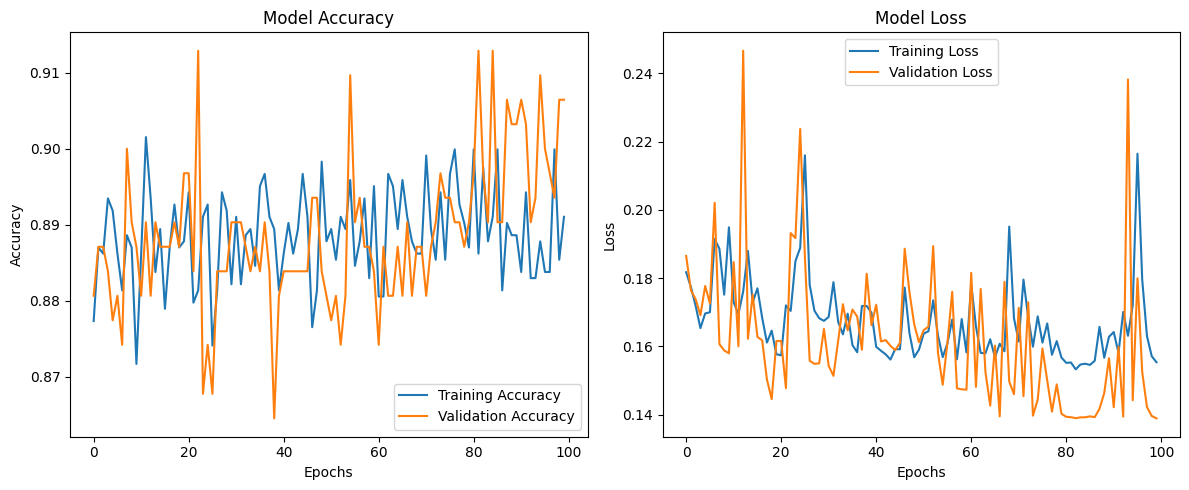

In [25]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function to visualize the training process
plot_training_history(history)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


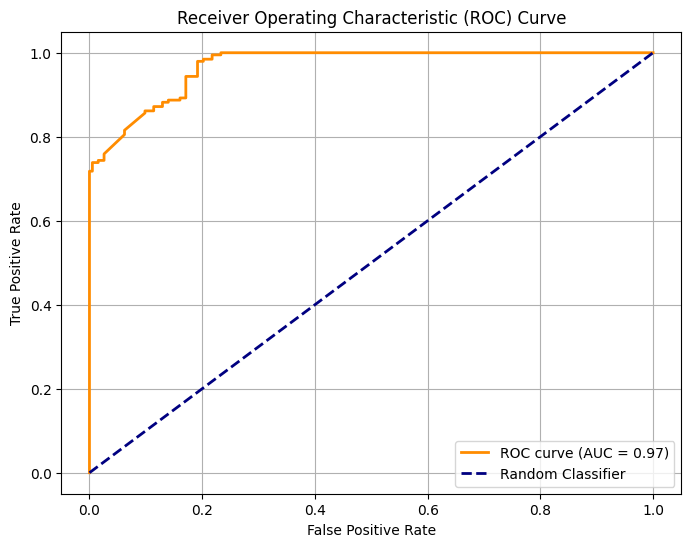

In [31]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions and calculate ROC curve
y_pred_prob = model.predict(X_test_scaled).ravel()  # Predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [29]:
# Ask the user for input features
print("Please enter the following details:")

user_input = []

try:
    user_input.append(int(input("Autism Spectrum Quotient score (AQ1): ")))
    user_input.append(int(input("Autism Spectrum Quotient score (AQ2): ")))
    user_input.append(int(input("Autism Spectrum Quotient score (AQ3): ")))
    user_input.append(int(input("Autism Spectrum Quotient score (AQ4): ")))
    user_input.append(int(input("Autism Spectrum Quotient score (AQ5): ")))
    user_input.append(int(input("Autism Spectrum Quotient score (AQ6): ")))
    user_input.append(int(input("Autism Spectrum Quotient score (AQ7): ")))
    user_input.append(int(input("Autism Spectrum Quotient score (AQ8): ")))
    user_input.append(int(input("Autism Spectrum Quotient score (AQ9): ")))
    user_input.append(int(input("Autism Spectrum Quotient score (AQ10): ")))
    user_input.append(int(input("Social Responsiveness Scale (0 to 100): ")))
    user_input.append(int(input("Qchat_10_Score (0 to 10): ")))
    user_input.append(int(input("Age in years: ")))
    user_input.append(int(input("Sex (1 for Male, 0 for Female): ")))
    user_input.append(int(input("Anxiety disorder (1 for Yes, 0 for No): ")))
    user_input.append(int(input("Speech Delay/Language Disorder (1 for Yes, 0 for No): ")))
    user_input.append(int(input("Learning disorder (1 for Yes, 0 for No): ")))
    user_input.append(int(input("Genetic Disorders (1 for Yes, 0 for No): ")))
    user_input.append(int(input("Depression (1 for Yes, 0 for No): ")))
    user_input.append(int(input("Jaundice (1 for Yes, 0 for No): ")))
    user_input.append(int(input("Family member with ASD (1 for Yes, 0 for No): ")))
    user_input.append(int(input("Global developmental delay/intellectual disability (1 for Yes, 0 for No): ")))
    user_input.append(int(input("Social/Behavioural Issues (1 for Yes, 0 for No): ")))
    user_input.append(int(input("Who completed the test (1 for Parent, 0 for Doctor): ")))
    user_input.append(int(input("ASD_traits (1 for Yes, 0 for No): ")))
except ValueError as e:
    print(f"Invalid input. Error: {e}")

# Predict and display result
try:
    
    result = predict_asd_rnn(user_input)
    print(f"Prediction: {result}")
except Exception as e:
    print(f"An error occurred during prediction: {e}")

Please enter the following details:


Autism Spectrum Quotient score (AQ1):  0
Autism Spectrum Quotient score (AQ2):  1
Autism Spectrum Quotient score (AQ3):  0
Autism Spectrum Quotient score (AQ4):  1
Autism Spectrum Quotient score (AQ5):  0
Autism Spectrum Quotient score (AQ6):  1
Autism Spectrum Quotient score (AQ7):  01
Autism Spectrum Quotient score (AQ8):  1
Autism Spectrum Quotient score (AQ9):  0
Autism Spectrum Quotient score (AQ10):  1
Social Responsiveness Scale (0 to 100):  0
Qchat_10_Score (0 to 10):  1
Age in years:  9
Sex (1 for Male, 0 for Female):  1
Anxiety disorder (1 for Yes, 0 for No):  0
Speech Delay/Language Disorder (1 for Yes, 0 for No):  1
Learning disorder (1 for Yes, 0 for No):  0
Genetic Disorders (1 for Yes, 0 for No):  1
Depression (1 for Yes, 0 for No):  1
Jaundice (1 for Yes, 0 for No):  1
Family member with ASD (1 for Yes, 0 for No):  1
Global developmental delay/intellectual disability (1 for Yes, 0 for No):  1
Social/Behavioural Issues (1 for Yes, 0 for No):  1
Who completed the test (1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction: Likely to have ASD


C:\Users\Saurabh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
